# Tutorial in Diffraction Imaging

## Chapter 1. Projection images

In this section, we will start to look at the basic relation between an object, the Fourier transform of the object and an image of the object. The aim is to give you a general idea of what is going on, so don't worry if you don't understand every detail at this stage we will study the details more closely in the following sections. The point of this tutorial is not to test your Python knowledge, so examples of most of the code that you need to write is given in the tutorial.

## 1.1 Setting the scene

You should be able to read the data for the caffeine molecule into Python with the command **caf = Molecule('caffeine.pdb')**. The class **Molecule** reads the **ATOM** fields of a standard PDB-file (caffeine.pdb in this case) and returns the data in a class object (which we named caf in this example). Once the object is created, you can access the coordinates of the atoms with the commands **caf.x**, **caf.y** and **caf.z**. The object contains several other fields, but you don't need to worry about those for the moment.

In [1]:
%%capture
# Suppress warning output when importing matplotlib.
%matplotlib inline
# To enable interactive figures in the IPython notebook: use '%matplotlib notebook' instead
# But this interactive mode has some display problems.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
# All functions required for Chapter 1 is contained in Projection.py
from Projection import *

In [3]:
# Read the pdb file for caffeine molecule.
caf = Molecule('caffeine.pdb')

In [4]:
print "name: ", caf.name
print "elements: ", caf.element
print "pos x: ", caf.x
print "pos y: ", caf.y
print "pos z: ", caf.z
print "coordinate[1,3]: ", caf.crd[1][3]
print "IDP: ", caf.IDP

name:  ['N1', 'C2', 'C3', 'C4', 'C5', 'N6', 'N7', 'N8', 'C9', 'C10', 'C11', 'C12', 'O13', 'O14']
elements:  ['N', 'C', 'C', 'C', 'C', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'O', 'O']
pos x:  [0.011, 1.357, -0.187, 1.08, -1.022, 2.046, 1.284, -1.086, 2.643, -2.249, -1.381, 0.193, -2.541, 0.335]
pos y:  [2.295, 2.47, 0.922, 0.375, 3.323, 1.332, -0.985, -1.253, -1.525, -2.148, 0.13, -1.854, 0.535, -3.069]
pos z:  [0.021, 0.025, -0.005, -0.004, -0.034, 0.015, -0.012, -0.008, -0.004, 0.001, 0.015, -0.012, 0.05, -0.015]
coordinate[1,3]:  0.375
IDP:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Use the command **drawmol(caf)** to display a graphical space- lling model of the ca eine molecule. For an explanation of the colors, type help drawmol. You can rotate the molecule, zoom in and out, etc. using your mouse together with the camera toolbar of the graphics window. For a top view, type view(2). The command axis on displays a set of coordinate axes and axis off turns them o  again. The units of the axes are Ångströms. Approximately how large is the molecule?

## 1.2 Your first projection

By a projection of a function we mean an integral of the function along a single coordinate,

$$
P_z(x, y) = \int_{-\infty}^{\infty} \rho(x,y,z)\text{d}z
$$

Formally, this is called a Radon transform. Such a projection essentially squeezes the function flat along one coordinate axis (the z-axis in the above equation). Since the caffeine molecule is already practically flat in the xy-plane, a projection along the z-axis does not look much different from the original viewed from the top.

A tomogram, such as an electron microscopy image, an X-ray tomogram or an ultrasound image, is to a very good approximation a projection of an object. The beauty of projections, from our point of view, is that they have a very simple interpretation in Fourier space: **The Fourier transform of a projection is a plane passing through the origin of the Fourier transform of the projected object.** This is often called the Fourier-slice theorem or the projection theorem, and it is the basis of all types of tomography.

We will refer to the Fourier transform of a molecule's electron density as the *molecular transform*. The space of the molecular transform may be called Fourier space, frequency space, reciprocal space or diffraction space. The space of the electron density is simply called real space. The two spaces work pretty much the same (they are both Euclidean). Notationally we will distinguish Fourier space from real space by renaming the coordinate triple $xyz$ to $hkl$. A projection of the electron density along the $z$-axis (as in the above equation) then corresponds to the $hk$-plane of the molecular transform.

Using Python, construct a set of points in the $hk$-plane. Let this example be your guideline:

In [5]:
# Distance between samples
step = 1/8.
cutoff = 5

# Sample points on positive h-axis
h = np.arange(0, cutoff, step) + step
# Add sample points on negative axis and at the origin
h = np.concatenate((h[::-1], np.zeros(1), -h),axis=0)

# Use the same points for the k-axis
k = h

In [6]:
# Construct a two-dimensional grid
[H,K] = np.meshgrid(h,k)
L = np.zeros_like(K)

Use the above settings for step length and cutoff for now (we will look at the effect of different settings later). You can view the plane with the command

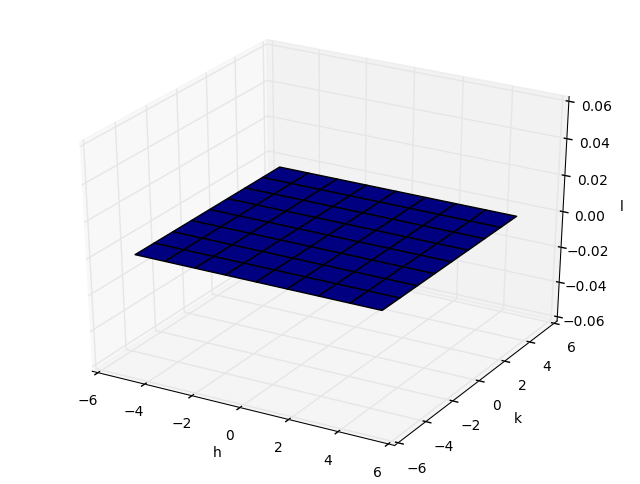

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(H, K, L)
ax.set_xlabel('h')
ax.set_ylabel('k')
ax.set_zlabel('l')

Then evaluate the molecular transform of the caffeine molecule on the plane using the function **moltrans**

In [8]:
F = moltrans(caf, H,K,L)

Given a molecule struct, **moltrans** calculates the Fourier transform of the molecule's electron density at the points $H$, $K$ and $L$. The reason that we cannot use Python's built-in Fourier transform is that we don't explicitly know the electron density; the PDB-file only contains the information about the atom types and positions. **moltrans** is able to work directly with data from a PDB-file.

By the Fourier-slice theorem, the data $F$ corresponds to the *Fourier transform of a projection of the caffeine molecule along the z-axis*. We can easily verify this by inverse transforming the data. Python provides the functions **fft**, **fft2** and **fftn** for the Fourier transform. We will use **ifftn** which performs an n-dimensional inverse discrete Fourier transform

In [9]:
from numpy import fft

In [10]:
rho = np.fliplr(fft.fftshift(abs(fft.ifftn(F, [2**10, 2**10]))))

You don't need to fully grasp the details of that function call yet, but here's a short explanation: $F$ is the function we transform. The vector [$2^{10}$,$2^{10}$] essentially tells **ifftn** how many sample points in each dimension it should evaluate the transform on (try remove this argument and compare the result). We use **ifftn** which differs from **fftn** by a minus sign in the exponential and a scale factor. We could use **fftn**, but then the result would be scaled and inverted with respect to the original, just like in a real imaging system. We take the absolute value, because the result may have a small imaginary part due to numerical instabilities (actually, it may have quite a large imaginary part, but it is a purely computational side-effect which is correctly compensated for if the absolute value is taken). Finally, we need the function **fftshift** because the "normal" behavior of the **FFT** is to put the center point in the upper left corner and the upper left corner in the center.

Now view the output of the Fourier transform (i.e. **rho**) using **imshow**. If you use the code below, you should get the right units on the axis.

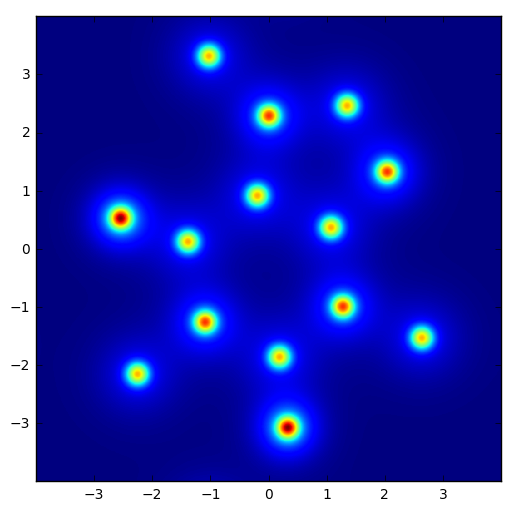

In [11]:
# Create vectors for the x and y coordinates.
size = rho.shape
x = np.linspace(0,1-1./size[1],size[1])/step
y = np.linspace(0,1-1./size[0],size[0])/step
x = x - np.mean(x)
y = y - np.mean(y)

# Draw the image
plt.imshow(rho, interpolation='none', extent = [x[0], x[-1], y[0], y[-1]])

Does this seem like a reasonable projection of the caffeine molecule? You can compare to a two-dimensional plot of the form **plot(caf.x,caf.y, 'o')**(either open a new figure window first with the command **figure**, or plot in the same image above). In what sense is a two dimensional plot of a three-dimensional function similar to a projection? Also, in the projection image you will see a few spots that shine more brightly than the rest. Can you explain this? In fact, there are three different levels of brightness of the spots, although the intermediate ones may be hard to distinguish from the low-intensity spots.

**TODO:** For clues, look again at the space-fill model with **drawmol(caf)**. Set the view so that you look straight at the $xy$-plane with the command **view(2)**. You can also view the contour curves of the projected electron density using **contour(x,y,rho)**. Zoom in on different atoms to see more clearly.

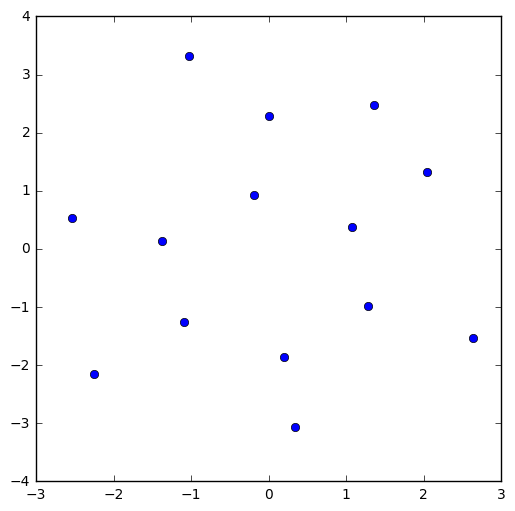

In [12]:
plt.figure(figsize = (6,6))
plt.plot(caf.x, caf.y, 'o')

Let's return for a bit to the section of the molecular transform that we created with **moltrans**. The molecular transform $F$ is a complex function which we cannot measure directly (if you look at your matrix $F$ you will see that all entries but one are complex). We can attempt to measure the molecular transform in a diffraction experiment, but what we actually will record is the intensity of the transform, i.e., the square of its amplitude. To measure the intensity of the section of the molecular transform that you created earlier, we would direct radiation along the $z$-axis of the molecule. We would also have to use radiation with an extremely short wavelength. X-rays would be too long, but more about this later in the section about the Ewald sphere.

The intensity can be calculated as **ints = np.square(abs(F))**; Visualize the intensity of your matrix $F$ with the commands

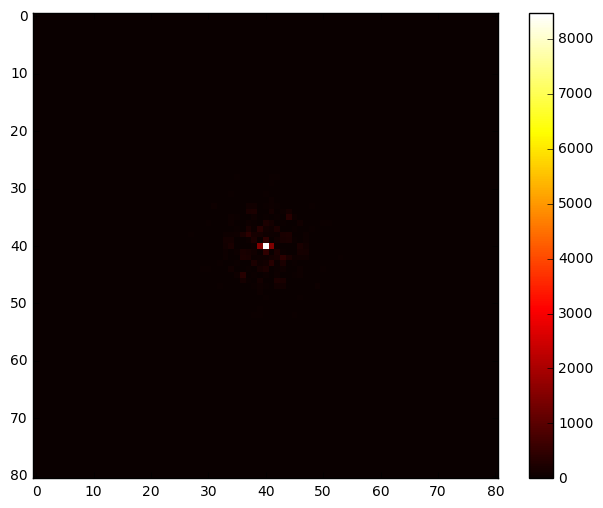

In [13]:
ints = np.square(abs(F))
plt.imshow(ints, interpolation='none', cmap = 'hot')
plt.colorbar()

As you see, the image is mostly dark. This is because the central pixel is so intense in comparison to the rest. You can perhaps see this more clearly with a 3D plot. 

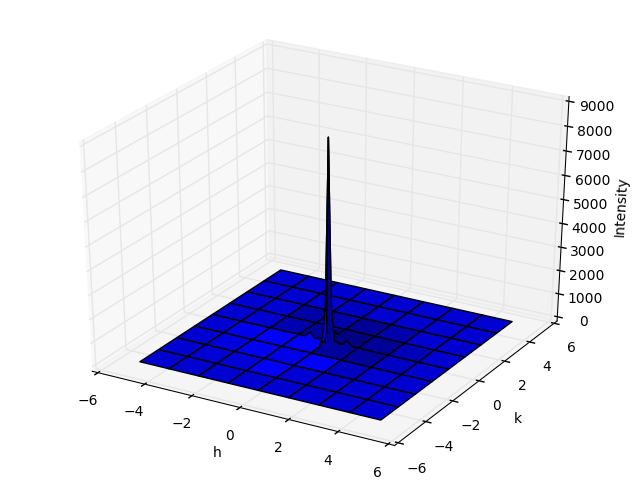

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(H, K, ints)
ax.set_xlabel('h')
ax.set_ylabel('k')
ax.set_zlabel('Intensity')

A work-around is to plot the logarithm of the intensities:

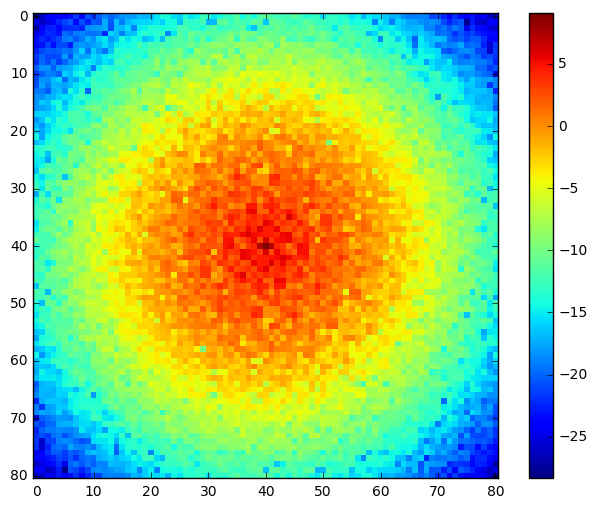

In [15]:
plt.imshow(np.log(ints), interpolation='none')
plt.colorbar()

You can also see that the diffraction pattern is sampled quite coarsely. Increasing the sampling density may yield a prettier picture, but it would not provide more information about the structure (we may look more closely at this later; it is explained by the sampling theorem for bandlimited functions).

## Chapter 2. Diffraction concepts

## 2.1 Imaging with a lens

In this section we will explore some concepts in imaging and diffraction which hopefully will help you understand the previous part a bit better. A schematic imaging system is shown below:

<img src="Imaging.png" style="float:left; width: 700px;" >

- A planar wave illuminates an object.
- The object scatters, or diffracts, the wave. You can regard terms scattering and diffraction as synonyms throughout this tutorial.
- The lens captures a section of the scattered radiation. The larger the section, the better the final resolution of the image.
- The lens focuses the diffracted wave into an image of the object. The image is inverted, scaled and generally degraded with respect to the original.

The scattered wave contains all available structural formation about the object (up to what is called the diffraction limit, but we will look more at that later). Note that the incident wave is scattered in all directions forwards, backwards, etc. Therefore a lens placed in front of the object normally captures a rather small part of the available information.

For the imaging systems studied in this lab, we could state the imaging process in more mathematical terms like this: The scattered wave represents part of the Fourier transform of the object. The lens performs a second Fourier transform on (part of) the scattered wave. The result in the 2D case is an inverted, scaled and degraded copy of the original.

## 2.2 Imaging without a lens -- diffraction imaging

In some cases we are unable to design optics that can focus the scattered radiation with reasonable accuracy. X-rays of short wavelength, for example, are very diffcult to focus. In such a case, we must record the scattered radiation (the diffraction pattern) directly. The action of the lens (i.e. a Fourier transform) is then simulated with computer software.

A problem with this method is that we can only record the intensity of the scattered wave, not the phase. In the previous sections the phases have always been known (that is why the molecular transform has been represented by complex numbers). In reality, the phases will be lost and need to be found again before we can recover an image of the object. This step of phase retrieval is central to diffraction imaging and will be studied in a later part of the lab.

## 2.3 Some imaging theory

A single two-dimensional image contains two-dimensional information such as the surface of an object or one of its projections. A three-dimensional image, containing three dimensional information about an object, must normally be assembled from multiple two-dimensional measurements. For example, it can be based on multiple projections (like the ones you studied in the previous part). That technique is called tomography. Another widespread technique is X-ray crystallography, used for atomic-resolution imaging of crystalline samples. The diffraction patterns obtained in X-ray crystallography does not, in general, correspond to projection images of the object.

Both techniques can be viewed as special cases of a more general theory of imaging, based on the following equation which applies to two-dimensional objects as well as three-dimensional objects that are nearly transparent (the Born approximation). The electric field $\mathbf{E}$ elastically scattered by an object with scattering density $\rho$ can be approximated by the equation

$$
\mathbf{E}_{s,\infty}(\mathbf{k}_{s}, \mathbf{k}_{in}) = \int \rho (\mathbf{r})e^{-2\pi i \mathbf{r} \cdot (\mathbf{k}_{s} - \mathbf{k}_{in})} \text{d} \mathbf{r} = F(\mathbf{k}_{s}, \mathbf{k}_{in})
$$

where the subscript $\infty$ marks that the field is measured at large distance from the object (this is called the far-field approximation).

The vectors $\mathbf{k}_{in}$ and $\mathbf{k}_{s}$ are the *wave vectors* of the incident radiation and scattered radiation respectively. Wave vectors are vectors that point in the direction that the wave propagates; their length is given by the spatial frequency of the wave, which is simply the inverse of the wavelength. The equation applies to elastically scattered waves, which means that $\mathbf{k}_{in}$ and $\mathbf{k}_{s}$ have the same length.

The equation says that the scattered electric field is proportional to the Fourier transform $F$ of the object $\rho$. If we measure intensity of the wave scattered in the direction of $\mathbf{k}_{s}$, we have measured the Fourier transform of the object at coordinate $\mathbf{k} = \mathbf{k}_{s} - \mathbf{k}_{in}$. The vector $\mathbf{k}$ is called the *scattering vector*.

- Draw a vector diagram illustrating the relationship between the incident wave, the wave scattered in some direction of your choice, and the scattering vector. Let all vectors have the same origin (i.e. keep their tails together).
- If you keep the incident wave fixed and measure the scattered wave in all possible directions, the tip of scattering vector will span surface in Fourier space. What type of surface (geometrical shape)?

## 2.4 The Ewald sphere

In Python, run the function **experiment**. This shows you a planar surface, a detector with a diffraction image. Rotate the image and you will also see a curved surface that represents what the diffraction data look like in Fourier space. The arrow represents the wave vector of the incident radiation. As you see, each point on the detector is mapped to a point on a sphere in Fourier space (compare with the last question in the previous section). This sphere is usually referred to as the Ewald sphere.

In [16]:
# All functions required for Chapter 2 is contained in Diffraction.py
from Diffraction import *

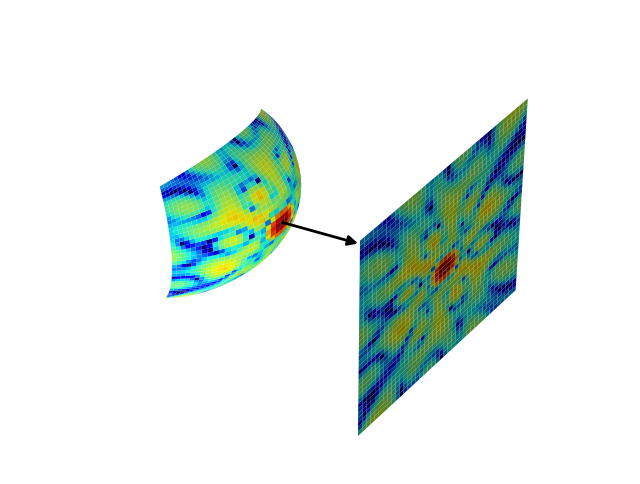

In [17]:
experiment()

You can draw an Ewald sphere with the function **ewaldsurf**, which takes a number of parameters. The first parameter is the wavelength in $\overset{\circ}{\text{A}}$, typically around 1$\overset{\circ}{\text{A}}$ for X-ray diffraction at atomic resolution. Plot the Ewald sphere for some wavelengths using **ewaldsurf(wavelength, plot=True)**. What happens to the size (radius) of the Ewald sphere as you increase/decrease the wavelength? Can you explain this in terms of the vectors you drew for the previous question?

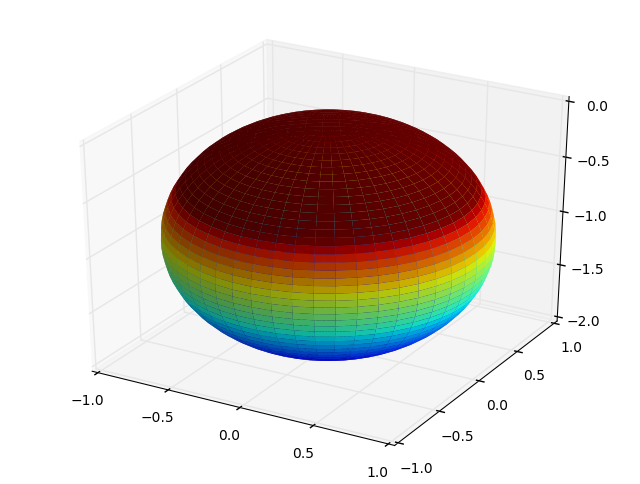

In [18]:
ewaldsurf(1, plot=True)

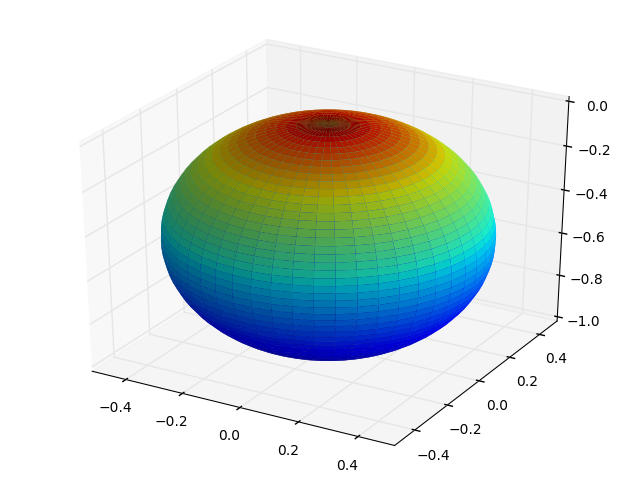

In [19]:
ewaldsurf(2, plot=True)

The second parameter of **ewaldsurf** is called the resolution. The resolution is a measure of the smallest resolvable detail in an image. Note that one would say that a resolution of 1$\overset{\circ}{\text{A}}$ is higher than a resolution of 5$\overset{\circ}{\text{A}}$, because at a resolution of 1$\overset{\circ}{\text{A}}$ you can resolve smaller details than at resolution of 5$\overset{\circ}{\text{A}}$. This is a very common source of confusion, so I will say it again: A high value of the resolution parameter corresponds to a low (poor) resolution; a low value of the resolution parameter corresponds high (good) resolution.

It gets even more confusing: in the function **ewaldsurf** the resolution parameter does not refer directly to the data in Fourier space. Instead, it refers to the extent of the Ewald sphere that is needed in order to reconstruct a real space image of the object with the given resolution. We will look a bit more at how all this works a bit later; for now you should understand that the resolution parameter is related to the maximum scattering angle for which you have recorded diffraction data. Specifically, it is the inverse of the scattering vector for the maximum scattering angle. Play around a bit with different wavelengths and resolutions, using **ewaldsurf(wavelength,resolution,plot=True)**. What happens if you decrease the resolution parameter while keeping the wavelength fixed? If you set the resolution parameter too low, you will get an error message. Can you motivate the error message?. Again, drawing a vector diagram should help.

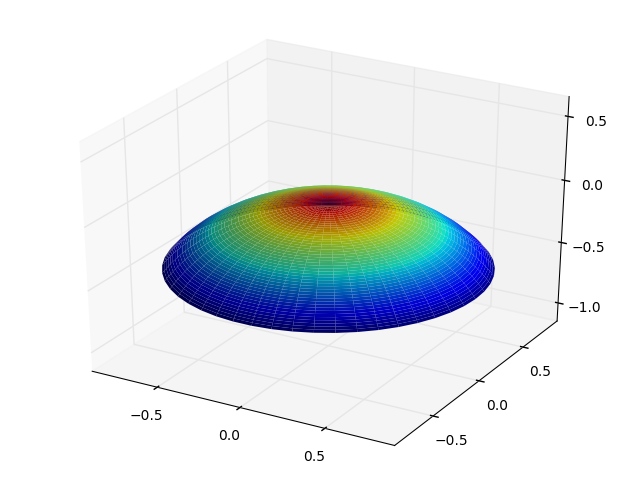

In [20]:
ewaldsurf(1, 1, plot=True)

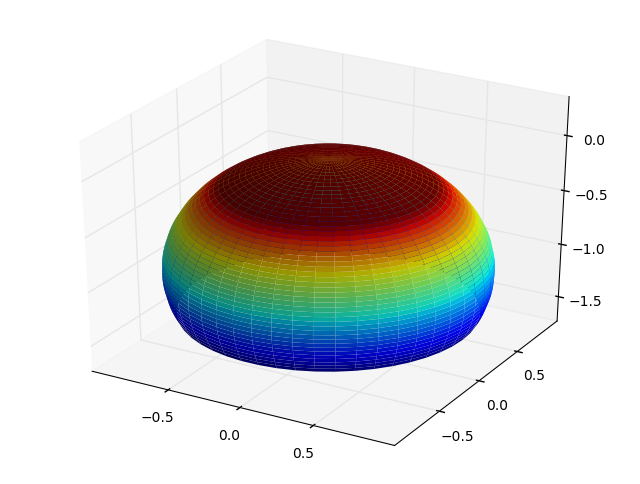

In [21]:
ewaldsurf(1, 0.6, plot=True)

In [22]:
ewaldsurf(1, 0.4, plot=True)

Resolution unachievable: resolution must be larger than lambda/2!


Try increasing/decreasing the wavelength while keeping the resolution fixed. You can plot multiple surfaces in one set of axes. How is the surface affected by the change in wavelength? In the first part of the lab you calculated projection images of a molecule, and you learned that those correspond to planar surfaces in Fourier space. To record a projection image, what requirement must you place on the wavelength relative the resolution? Electron microscopy typically produces projection images at atomic resolution. What does this say about the wavelength of the electrons used?

The Fourier transform of a single Ewald surface does not have a simple relationship to the object that is being imaged (the exception being when the surface is approximately planar so that the projection theorem applies, or when the object is two-dimensional). However, by measuring data on Ewald surfaces in a number of different orientations it is possible to sample a three-dimensional volume of Fourier space. By inverse-transforming the three-dimensional data we obtain a three-dimensional image of the object. You can visualize how multiple Ewald surfaces fills up a volume of Fourier space with the following code:

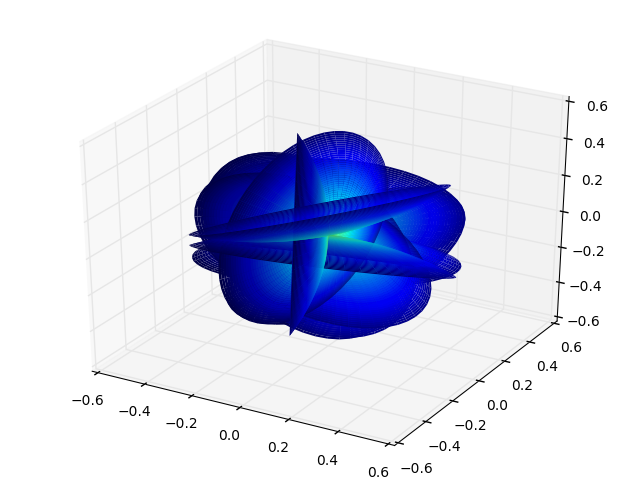

In [23]:
nViews = 10  # Number of views
res    = 2   # Resolution
lam = 1   # Wavelength
N      = 50  # Sets the sampling density in a non-obvious way.
phi   = 2*np.pi*np.random.rand(nViews)
theta = 2*np.pi*np.random.rand(nViews)
psi   = 2*np.pi*np.random.rand(nViews)
ewaldmult(lam, res, N, phi, theta, psi) # plot multiple Ewald surfaces

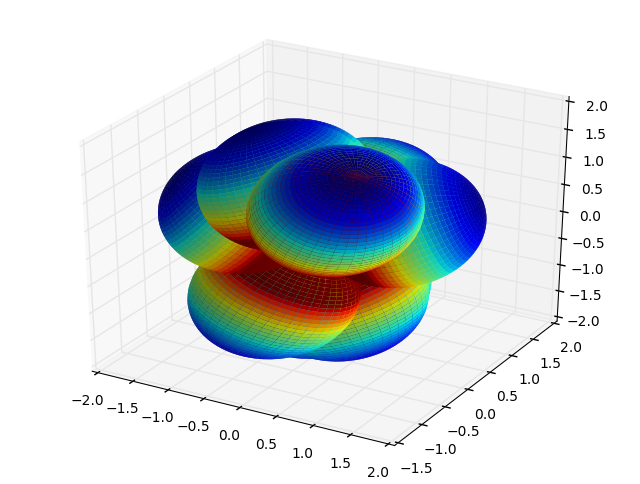

In [24]:
nViews = 10  # Number of views
res    = 0.5   # Resolution
lam = 1   # Wavelength
N      = 50  # Sets the sampling density in a non-obvious way.
phi   = 2*np.pi*np.random.rand(nViews)
theta = 2*np.pi*np.random.rand(nViews)
psi   = 2*np.pi*np.random.rand(nViews)
ewaldmult(lam, res, N, phi, theta, psi) # plot multiple Ewald surfaces

Play around a bit with different resolutions and number of views. As you can see, the further out from the origin you are, the larger the number of views needed to sample the space finely. In the following sections, you will see that the inner part of Fourier space corresponds to the large features of your object, whereas the outer parts correspond to the finer details. To obtain fine details of an object, one needs to record a large number of views.

## Chapter 3. Resolution

Recreate the projection of caffeine that you made in the first part. If you didn't make a script for this already, I suggest that you do so now. This file should create the $hk$-plane out to a given cut-off, calculate the molecular transform of caffeine on that plane, inverse transform to yield the projection, and display the projection with **imshow**.

Once you have recreated the projection, try to gradually decrease the cut-off. What happens to the atoms in the projection? What is the smallest cut-off that you can use and still distinguish individual (separated) atoms?

In the previous section, we mentioned that the resolution is the inverse of the maximum length of the scattering vector. Do you see what the relationship is between the maximum scattering vector and the cut-off variable? What is then the resolution you need to distinguish individual atoms?

## 3.1 How does it all work?

**Bragg's law** &nbsp; One way to look at the concept of resolution is Bragg's law. In crystallography this is usually written as

$$
\frac{1}{d_{\text{min}}} = \frac{2\sin \theta_{\text{max}}}{\lambda}
$$

In this equation $\theta_{\text{max}}$ is half the maximum angle for which the scattered radiation is measured and $d_{\text{min}}$, the resolution, is interpreted as the smallest distance between resolvable lattice planes. Derived in slightly different way, the law says

$$
k_{\text{max}} = 2 k_{\text{in}} \sin \theta_{\text{max}}
$$

Here, $k_{\text{max}}$ is the maximum length of the scattering vector and $k_{\text{in}}$ is the length of the incident wave vector. From the left-hand side of the equations, you see that the resolution $d_{\text{min}}$ is equivalent to $1/k_{\text{max}}$. Do you see that the right-hand side of two equations are equivalent? (Remember the the definition of a wave vector). What does $k_{\text{max}}$ correspond to in the planes that you created when calculating projections? In terms of the variables you used when creating projections, what is the resolution of the projections?

**The convolution theorem** &nbsp; Once you have accepted the relationship between diffraction and the Fourier transform of the electron density, it is often simpler to understand properties of diffraction in terms of the properties of the Fourier transform. For example, the electron density is a real function, and the Fourier transform of a real function is always hermitian. The absolute value of an hermitian function is centrosymmetric (symmetric around the origin, or even). Therefore, diffraction data, which represent the absolute square of the molecular transform, are always centrosymmetric. You can see this if you look at one of your planes in Fourier space.

We will now look at the resolution concept from the viewpoint of Fourier transforms. The whole story is expressed by one of the most important theorems in Fourier analysis, the convolution theorem:

$$
\mathcal{F} \{ G \cdot H \} (r) = (g*h)(r) = \int h(r-u)g(u) \text{d} u
$$

The theorem says that if you take a function $G$, multiply by the function $H$ and Fourier transform the result, you will end up with the Fourier transform of $G$ (denoted $g$) convoluted with the Fourier transform of $H$ (denoted $h$). The convolution theorem is exceptionally useful and one of the main reasons for the wide-spread use of Fourier transforms in computing today.

In the following section we will take a look at how the convolution theorem relates the resolution of an image to the distance that the diffraction data extends from the origin of Fourier space.

- Evaluate the molecular transform of caffeine on two planes: **F10** (using a cut-off of 10) and **F2** (using a cut-off of 2).

In [25]:
# Distance between samples
step = 1/8.
cutoff = 10

# Sample points on positive h-axis
h = np.arange(0, cutoff, step) + step
# Add sample points on negative axis and at the origin
h = np.concatenate((h[::-1], np.zeros(1), -h),axis=0)

# Use the same points for the k-axis
k = h

# Construct a two-dimensional grid
[H,K] = np.meshgrid(h,k)
L = np.zeros_like(K)

F10 = moltrans(caf, H,K,L)

# Distance between samples
step = 1/8.
cutoff = 2

# Sample points on positive h-axis
h = np.arange(0, cutoff, step) + step
# Add sample points on negative axis and at the origin
h = np.concatenate((h[::-1], np.zeros(1), -h),axis=0)

# Use the same points for the k-axis
k = h

# Construct a two-dimensional grid
[H,K] = np.meshgrid(h,k)
L = np.zeros_like(K)

F2 = moltrans(caf, H,K,L)

- Calculate projection images from these two planes (call them **rho10** and **rho2**).

In [26]:
rho10 = np.fliplr(fft.fftshift(abs(fft.ifftn(F10, [2**10, 2**10]))))
rho2 = np.fliplr(fft.fftshift(abs(fft.ifftn(F2, [2**10, 2**10]))))

- Create a rectangular window **W**

In [27]:
W = squarewin2(F2.shape, F10.shape)

- Multiply **F10** and **W**

In [28]:
F10W = F10*W

- Calculate the projection image corresponding to **F10W** (call it **rhoConv**).

In [29]:
rhoConv = np.fliplr(fft.fftshift(abs(fft.ifftn(F10W, [2**10, 2**10]))))

- Finally, calculate the transform of **W**

In [30]:
w = np.fliplr(fft.fftshift(abs(fft.ifftn(W, [2**10, 2**10]))))

Now plot **F10**, **F2**, **F10W** and **W**. Use subplot to display them all in a single figure. Set the colorbar range *[-12,9]* for **F10**, **F2**, **F10W** but for **W** to display the plots on the same color scale.

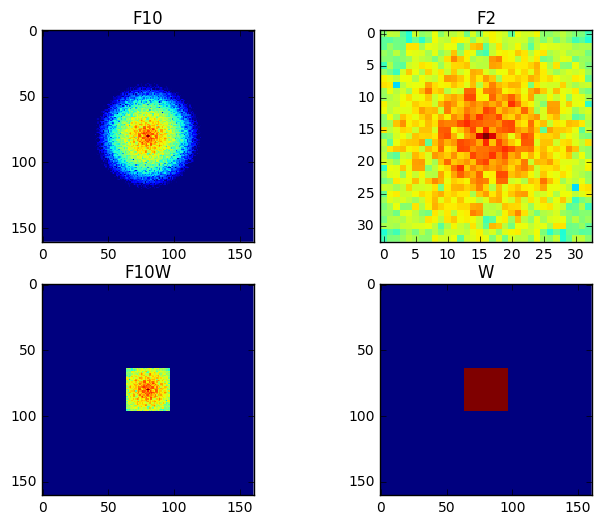

In [31]:
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(np.log(abs(F10)**2), interpolation='none', vmin=-12, vmax=9)
ax[0,0].set_title('F10')

ax[0,1].imshow(np.log(abs(F2)**2), interpolation='none', vmin=-12, vmax=9)
ax[0,1].set_title('F2')

tmp = abs(F10W)**2
tmp[tmp==0] = np.finfo(float).eps  # replace 0 with epsilon to avoid problem with taking np.log.
ax[1,0].imshow(np.log(tmp), interpolation='none', vmin=-12, vmax=9)
ax[1,0].set_title('F10W')

ax[1,1].imshow(W, interpolation='none')
ax[1,1].set_title('W')

Open a new figure and make four subplots containing **rho10**, **rho2**, **rhoConv** and **w**.

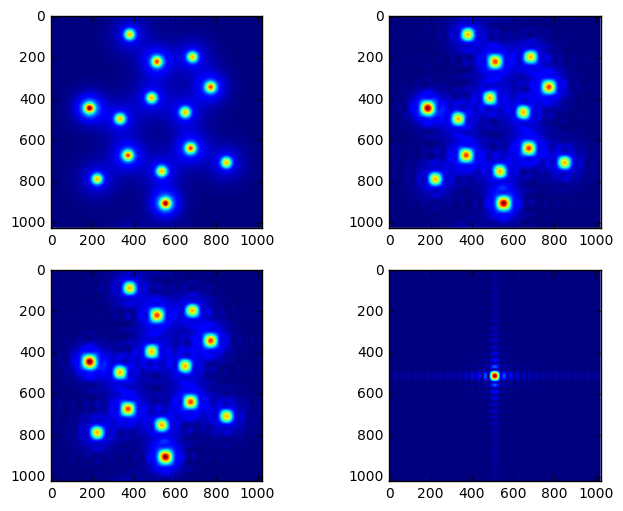

In [32]:
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(rho10, interpolation='none')
ax[0,1].imshow(rho2, interpolation='none')
ax[1,0].imshow(rhoConv, interpolation='none')
ax[1,1].imshow(w, interpolation='none')

If you take a closer look at **W**, you will see that it has the same size as the plane **F10** but that it takes value one within the area corresponding to **F2** and the value zero outside. It follows that **F2 = F10 · W** and that the images **F2** and **F10W** should be the identical but drawn at different scales. Check this by zooming in on **F10W**.

Now take a look at **rhoConv**. Applying what we said above and then the convolution theorem, we have

\begin{equation}
\begin{split}
\rho_{\text{conv}} &= \mathcal{F}^{-1} \{ F10 \cdot W \} = \mathcal{F}^{-1} \{ F2 \} \\
\rho_{\text{conv}} &= \rho_{10} * w = \rho_{2}
\end{split}
\end{equation}

where $w$ is the inverse Fourier transform of $W$. Hopefully, the images will show that **rhoConv** is identical to **rho2**.

The take-home message is the following: Since we don't measure the full, infinite, molecular transform (which we never can), we are in effect multiplying the infinite transform by some cut-off window (i.e. W). The effect of this in real space is **to convolute the true density with the transform of the cut-off window**. The effect of the convolution is to **smear out the density**, thus decreasing the resolution. In signal-processing terminology, $w$ is called a low-pass  lter. What is left after filtering is the low-frequency part of the density, corresponding to the inner part of the Fourier transform. $W$ is called the transfer function of the filter.

## 3.2 More on the rectangle function

Take another look at the Fourier transform of $W$. What you see is a two-dimensional **sinc** function,

$$
\text{sinc} (x,y) = \frac{\sin \pi x}{\pi x} \frac{\sin \pi y}{\pi y}
$$

The sinc function is also called the filtering function or interpolating function. It turns out that low-pass filtering and interpolation are related operations. If you look closely at the projection images, you can see the footprints of the **sinc** function in the form of electron density side-lobes around the atoms.

Plot the one-dimensional sinc function with Python.

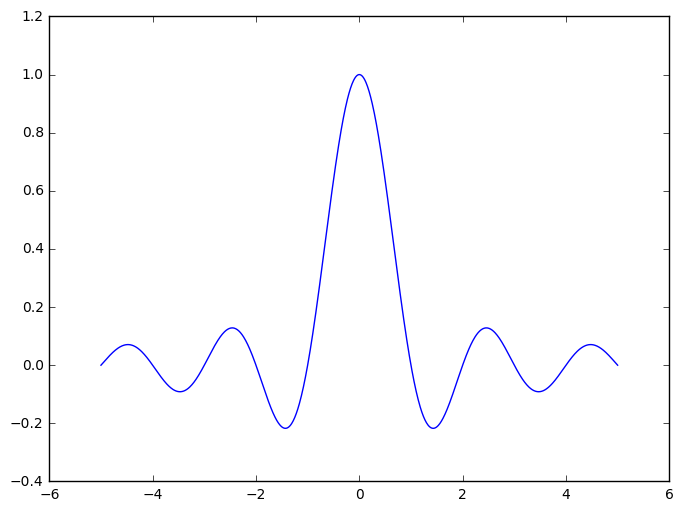

In [33]:
x = np.linspace(-5, 5, 1001)
plt.plot(x, np.sinc(x))

What is the width of the main lobe (central lobe) of the sinc-function? Try **plot(x,sinc(2*x))**. What is the width of the main lobe now? What is it for **sinc(0.5x)**? I guess this is pretty obvious from the equation. The interesting part comes here: The precise relationship between the sinc-function and the rectangle function W is

$$
\text{rect}(ak) = \mathcal{F} \left\{ \frac{1}{|a|} \text{sinc} \left( \frac{x}{a} \right) \right\}
$$

Or, in terms of the **cutoff** variable,

$$
\text{rect} \left(\frac{k}{2\cdot \text{cutoff}} \right) = \mathcal{F} \left\{ 2\cdot \text{cutoff} \cdot \text{sinc} (2\cdot \text{cutoff} \cdot x) \right\}
$$

What is the relationship between the size of the cut-off in Fourier space, the width of the main lobe of the sinc function and what we call resolution?